# Page view time analysis

<hr style="border:2px solid blue"/>

In [1]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('page_view_time_data.csv', parse_dates=['date']).set_index('date')

In [3]:
df.head()

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933


<hr style="border:2px solid blue"/>

## Cleaning data

In [4]:
views_lower_limit = np.percentile(df['value'], 2.5)
views_upper_limit = np.percentile(df['value'], 97.5)

indexes = df.loc[
    (df['value'] < views_lower_limit) |
    (df['value'] > views_upper_limit)
].index

df.drop(indexes, inplace=True)

<hr style="border:2px solid blue"/>

## Plotting line chart

<AxesSubplot:title={'center':'Daily freeCodeCamp Forum Page Views 5/2016-12/2019'}, xlabel='Date', ylabel='Page Views'>

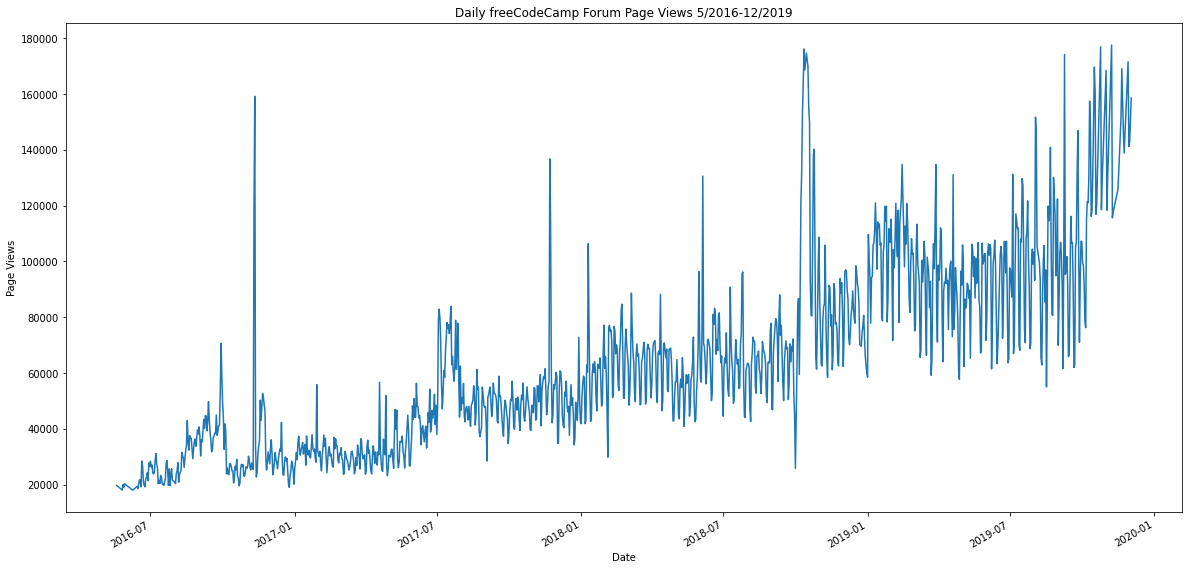

In [5]:
df['value'].plot.line(
    figsize=(20, 10), 
    title='Daily freeCodeCamp Forum Page Views 5/2016-12/2019', 
    xlabel='Date', 
    ylabel='Page Views'
)

<hr style="border:2px solid blue"/>

## Plotting bar chart

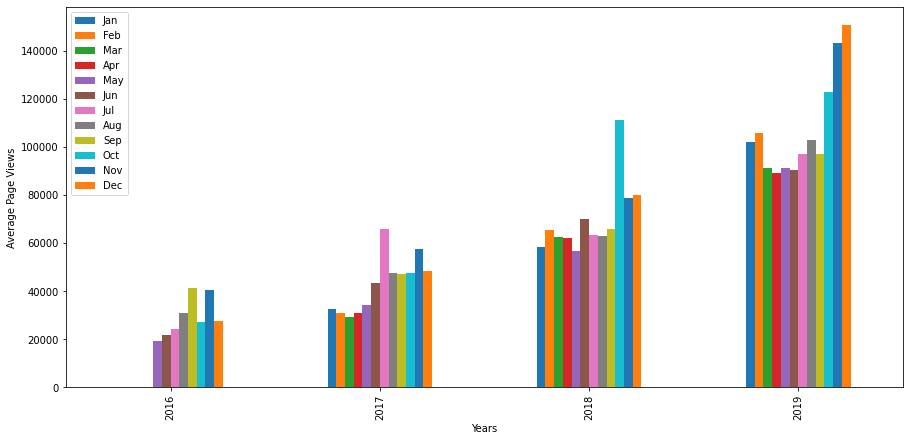

In [6]:
df_for_bar = df.groupby([df.index.year, df.index.month])['value'].mean().unstack()

df_for_bar.plot.bar(legend=True, figsize=(15, 7), xlabel='Years', ylabel='Average Page Views')
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
plt.legend(months)

<hr style="border:2px solid blue"/>

## Plotting box plots

Text(0, 0.5, 'Page Views')

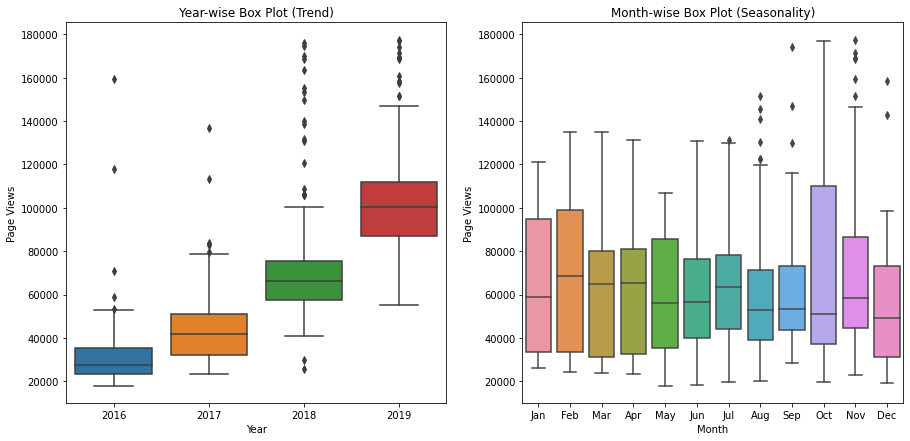

In [7]:
df_for_box = df.copy().reset_index()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 7))

sns.boxplot(x = df_for_box['date'].dt.year, y = df_for_box['value'], ax=axes[0])
axes[0].set_title("Year-wise Box Plot (Trend)")
axes[0].set_xlabel("Year")
axes[0].set_ylabel("Page Views")

sns.boxplot(x = df_for_box['date'].dt.strftime('%b'), y = df_for_box['value'], order=months, ax=axes[1])
axes[1].set_title("Month-wise Box Plot (Seasonality)")
axes[1].set_xlabel("Month")
axes[1].set_ylabel("Page Views")